<a href="https://colab.research.google.com/github/HussainPythonista/Australian_Housing_Prediction/blob/main/Housing_DataSet_Data_Preparation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statements:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
 

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 
Dataset Location:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [1]:
#Importing Necessary Library

#Basic Numerical Operation
import pandas as pd
import numpy as np

#visualize the data
import matplotlib.pyplot as plt
import seaborn as sb

#Test train split
from sklearn.model_selection import train_test_split

#Importing necessary library
from sklearn.linear_model import LinearRegression

#Importing statsmodel
import statsmodels.api as sm

from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#Checking the r**2 metrics
from sklearn.metrics import r2_score

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting the Dataset from Drive

house_price=pd.read_csv("/content/drive/MyDrive/ML_Dataset/Housing_Australian/house_price_Cleaned_standarized.csv")
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.131022,RL,0.237179,-0.333130,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,-0.786974,0.350400,No Feature,No Feature,No Feature,-1.598563,0.138730,WD,Normal,208500
1,-0.935412,RL,0.692573,-0.013184,Pave,No Feature,Reg,Lvl,AllPub,FR2,...,1.767499,-0.811469,No Feature,No Feature,No Feature,-0.488943,-0.614228,WD,Normal,181500
2,0.131022,RL,0.328258,0.445869,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,-0.786974,-0.011493,No Feature,No Feature,No Feature,0.990552,0.138730,WD,Normal,223500
3,0.397630,RL,0.085381,-0.027095,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,-0.786974,-0.144823,No Feature,No Feature,No Feature,-1.598563,-1.367186,WD,Abnorml,140000
4,0.131022,RL,0.814011,1.283293,Pave,No Feature,IR1,Lvl,AllPub,FR2,...,0.858861,0.788482,No Feature,No Feature,No Feature,2.100173,0.138730,WD,Normal,250000


#### Han

### Data Preparation

#### Convert the target variable into Normal Distribution

- In previous notebook we saw that our target variable is in Right skew format, we need to Hanfle before Model building

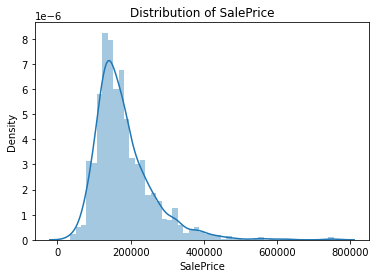

In [3]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sb.distplot(house_price['SalePrice'])
plt.show()

In [4]:
 #log transformed SalePrice is normally distributed, hence transformed data will be used for model building

house_price['SalePrice']= np.log(house_price['SalePrice'])

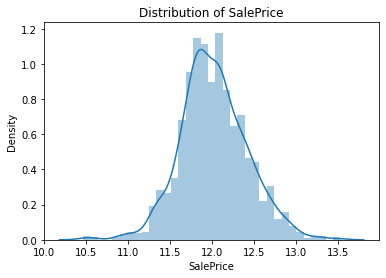

In [5]:
plt.title('Distribution of SalePrice')
sb.distplot(house_price['SalePrice'])
plt.show()

**After converting the Normal distribution**

### Creating Dummy Variables

In [6]:
house_price_test=pd.read_csv("/content/drive/MyDrive/ML_Dataset/Housing_Australian/house_price_test_Cleaned_standarized.csv")
house_price_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,-0.874411,RH,0.567135,0.363804,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,Y,0.366553,-0.701387,No Feature,MnPrv,No Feature,-0.038268,1.713318,WD,Normal
1,-0.874411,RL,0.615752,0.897553,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,Y,2.347063,-0.178765,No Feature,No Feature,Gar2,-0.038268,1.713318,WD,Normal
2,0.061330,RL,0.275437,0.809368,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,Y,0.930176,-0.207799,No Feature,MnPrv,No Feature,-1.140224,1.713318,WD,Normal
3,0.061330,RL,0.469903,0.032053,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,Y,2.088735,-0.178765,No Feature,No Feature,No Feature,-0.038268,1.713318,WD,Normal
4,1.464941,RL,-1.231670,-0.971475,Pave,No Feature,IR1,HLS,AllPub,Inside,...,Y,-0.729382,0.489031,No Feature,No Feature,No Feature,-1.874861,1.713318,WD,Normal


In [7]:
print(len(house_price.columns))
print(len(house_price_test.columns))

71
70


In [8]:
#Gathering Categorical Variables
categorical_variables_train=house_price.select_dtypes("object").columns
len(categorical_variables_train)

43

In [9]:
#Gathering Categorical Variables
categorical_variables_test=house_price_test.select_dtypes("object").columns
len(categorical_variables_test)

43

In [10]:
#Gathering and Assigning the categorical columns
dummieVariables_train=pd.get_dummies(house_price[categorical_variables_train],drop_first=True)

#Creating New datafame with combine dummies and parent Dataframe 
house_price_final=pd.concat([house_price,dummieVariables_train],axis=1)

#Dropping the categorical variable from final Dataset
house_price_final.drop(columns=categorical_variables_train,inplace=True)

In [11]:
#Checking the shape of data
house_price_final.shape

(1460, 253)

In [12]:
#Gathering Categorical Variables
categorical_variables_test=house_price_test.select_dtypes("object").columns
categorical_variables_test

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
#Gathering and Assigning the categorical columns
dummieVariables_test=pd.get_dummies(house_price_test[categorical_variables_test],drop_first=True)

#Creating New datafame with combine dummies and parent Dataframe 
house_price_test_final=pd.concat([house_price_test,dummieVariables_test],axis=1)

#Dropping the categorical variable from final Dataset
house_price_test_final.drop(columns=categorical_variables_test,inplace=True)

In [14]:
dummieVariables_train

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Feature,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [15]:
dummieVariables_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Feature,Alley_Pave,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_No Feature,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
house_price_test_final.shape

(1459, 240)

In [17]:
house_price_test_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_No Feature,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874411,0.567135,0.363804,-0.750844,0.400629,-0.340828,-1.072517,-0.563123,0.063406,-0.650238,...,0,0,0,0,1,0,0,0,1,0
1,-0.874411,0.615752,0.897553,-0.054858,0.400629,-0.439544,-1.214492,0.047040,1.063147,-0.339109,...,0,0,0,0,1,0,0,0,1,0
2,0.061330,0.275437,0.809368,-0.750844,-0.497247,0.843770,0.678509,-0.563123,0.773112,-0.954504,...,0,0,0,0,1,0,0,0,1,0
3,0.061330,0.469903,0.032053,-0.054858,0.400629,0.876675,0.678509,-0.450130,0.357835,-0.526701,...,0,0,0,0,1,0,0,0,1,0
4,1.464941,-1.231670,-0.971475,1.337113,-0.497247,0.679242,0.394559,-0.563123,-0.387027,1.058685,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.400682,-2.301230,-1.590785,-1.446829,1.298505,-0.044678,-0.646592,-0.563123,-0.964899,-0.018829,...,0,0,0,0,1,0,0,0,1,0
1455,2.400682,-2.301230,-1.599260,-1.446829,-0.497247,-0.044678,-0.646592,-0.563123,-0.411197,-0.595333,...,0,0,0,0,1,0,0,0,0,0
1456,-0.874411,4.456443,2.054445,-0.750844,1.298505,-0.373733,0.583859,-0.563123,1.724514,-1.267921,...,0,0,0,0,1,0,0,0,0,0
1457,0.646168,-0.307959,0.125484,-0.750844,-0.497247,0.679242,0.394559,-0.563123,-0.224432,0.047515,...,0,0,0,0,1,0,0,0,1,0


##### Insights:
- While checking the length of train and test data, I can see the train data length is 13 more than train data length.

**A smaller number of columns in the dummy variable matrix of the test dataset is not necessarily a problem as long as all the levels of the categorical variable that are present in the test dataset are also present in the train dataset.**

### Checking the Multicollinearity

- Here I'm gonna check the correlation between the independent variables, Dropping the Higher corealtion variables

In [18]:
len(house_price_final.columns)

253

In [19]:
columns_value=house_price_final.columns

batch_1=columns_value[:25]
batch_2=columns_value[25:50]
batch_3=columns_value[50:75]
batch_4=columns_value[75:100]
batch_5=columns_value[100:125]
batch_6=columns_value[125:150]
batch_7=columns_value[150:175]
batch_8=columns_value[175:200]
batch_9=columns_value[200:225]
batch_10=columns_value[225:]

#### Batch 1 Corelation 

- Checking the Correlation and handle highly corelated variables

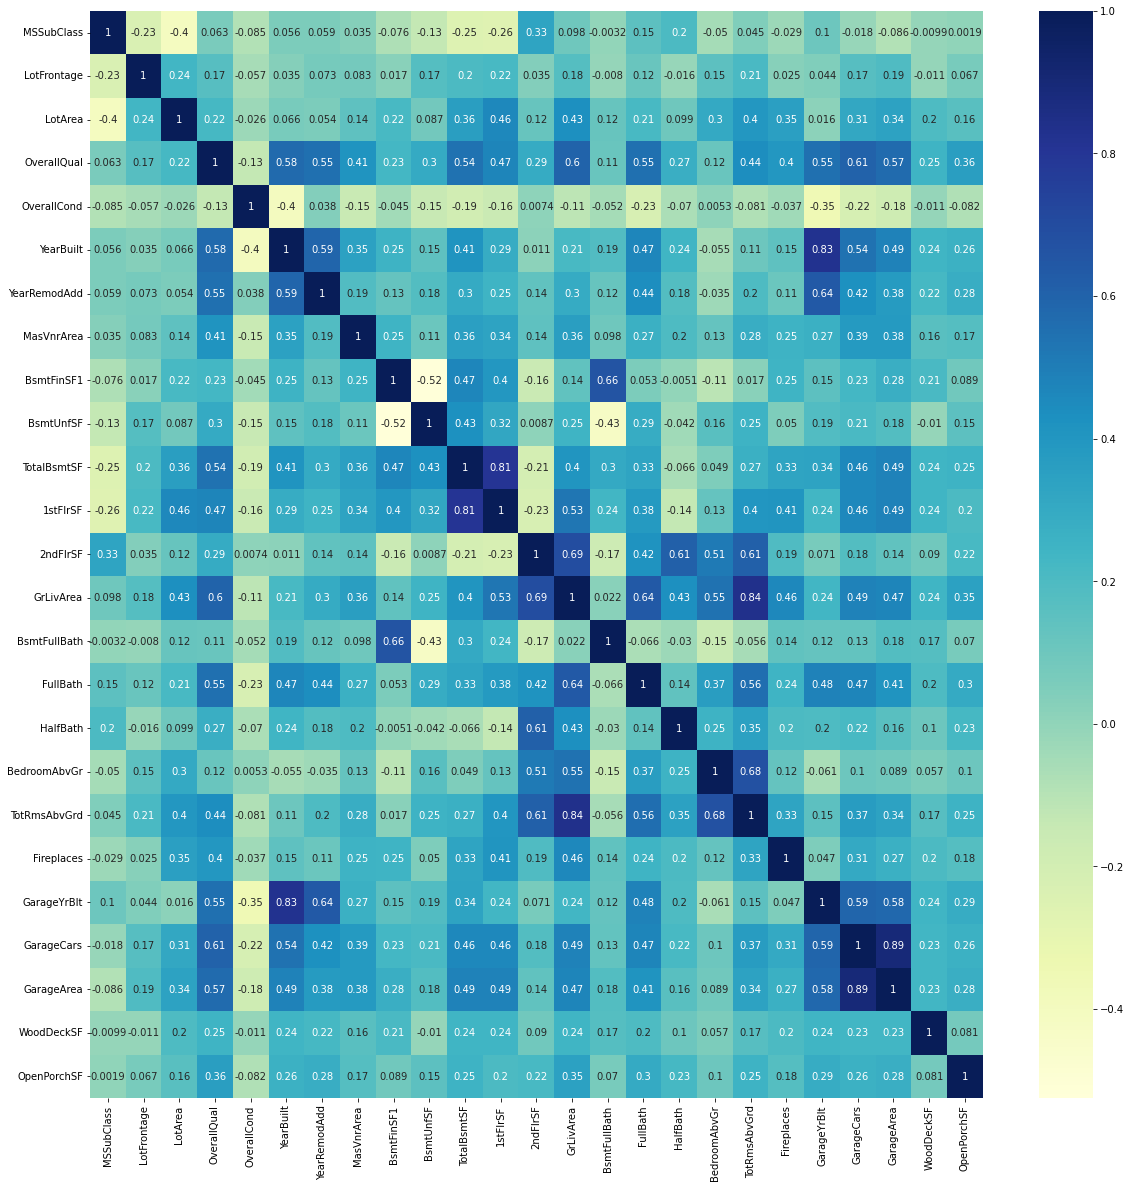

In [20]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_1].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

- **GarageArea and GarageCars has 89% of co-relation**
- **GarageYrBlt and YearBuilt has 83% of co-relation**
- **TotRmsAbvGrd and GrLivArea has 84% of co-relation**

Dropping either one of them is better idea as of now

In [21]:
house_price_final.drop(columns=["GarageCars","GarageYrBlt","GrLivArea"],inplace=True)

#### Batch 2 Corelation 

- Checking the Correlation and handle highly corelated variables

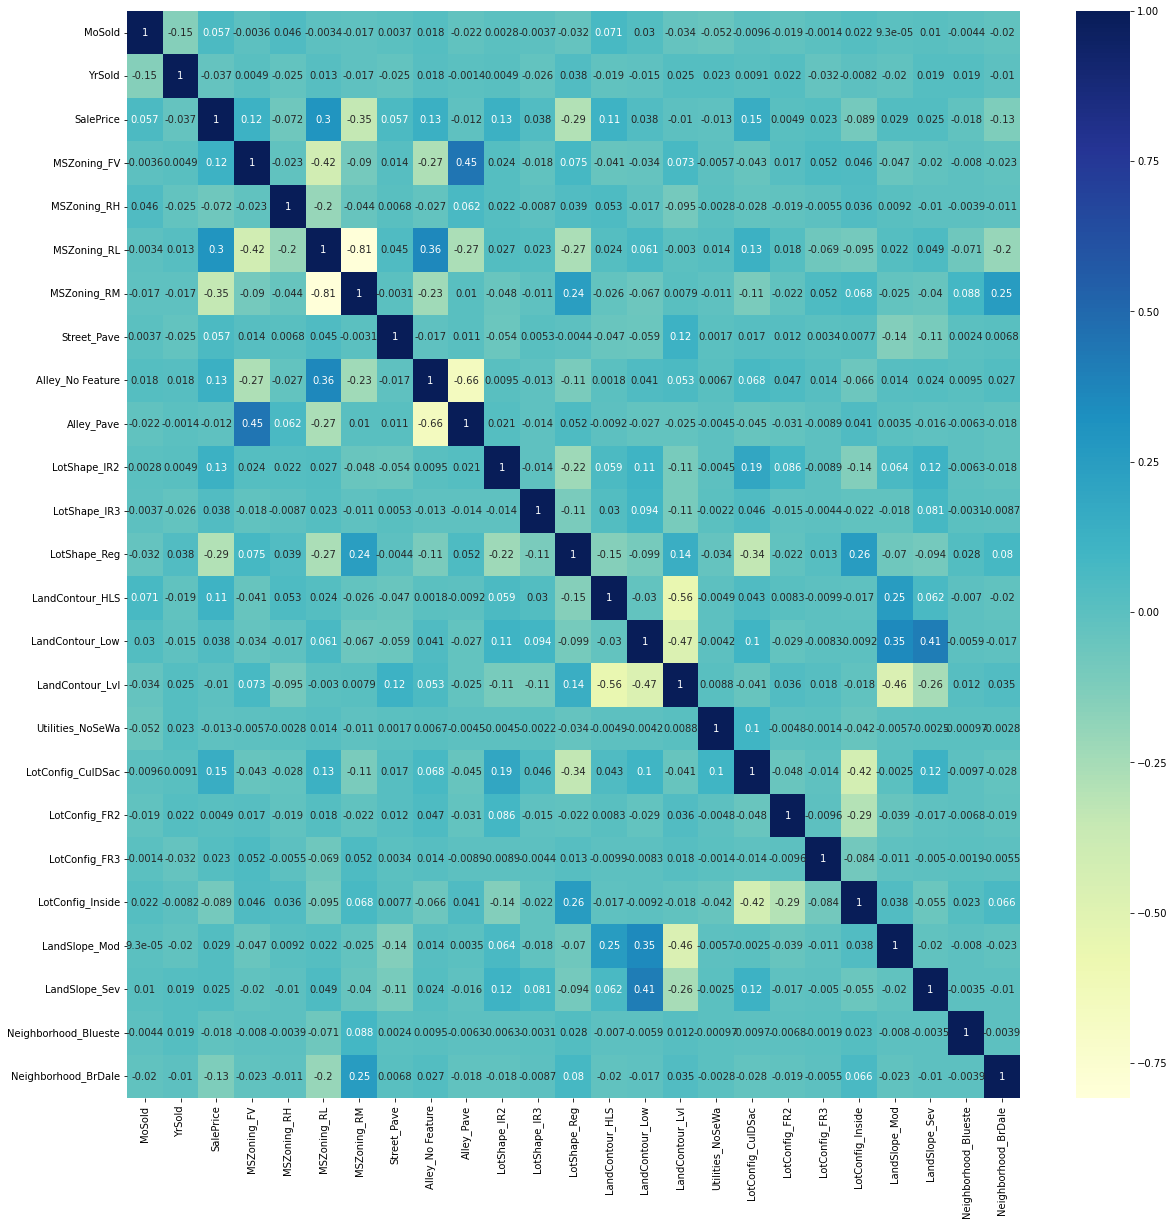

In [22]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_2].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 3 Corelation

Checking the Correlation and handle highly corelated variables

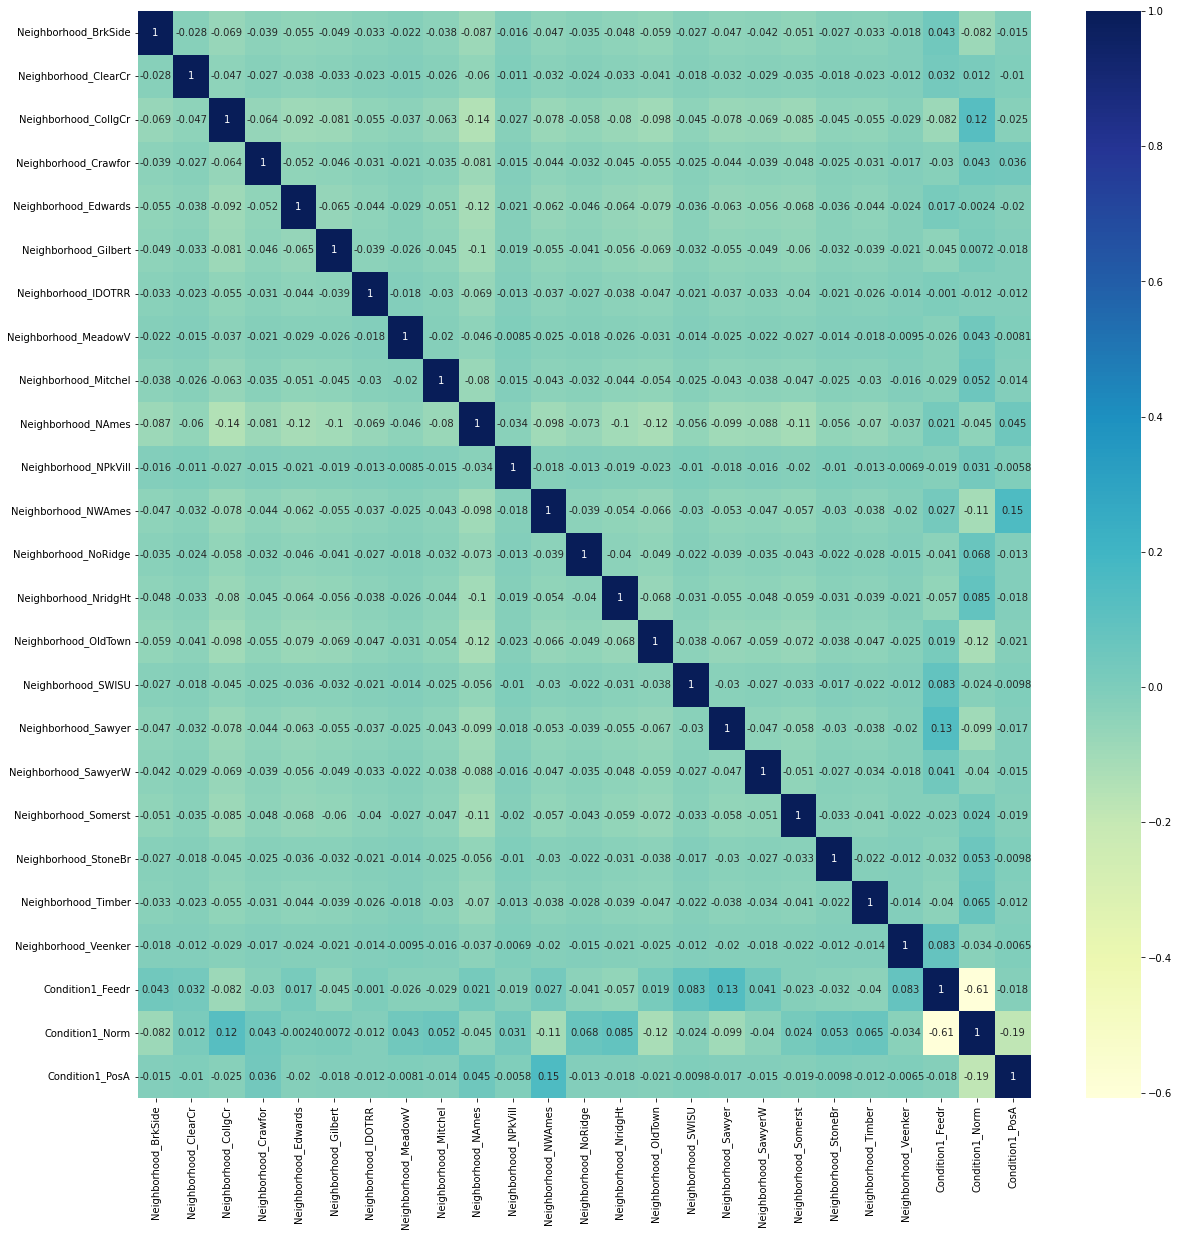

In [23]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_3].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 4 Corelation
Checking the Correlation and handle highly corelated variables

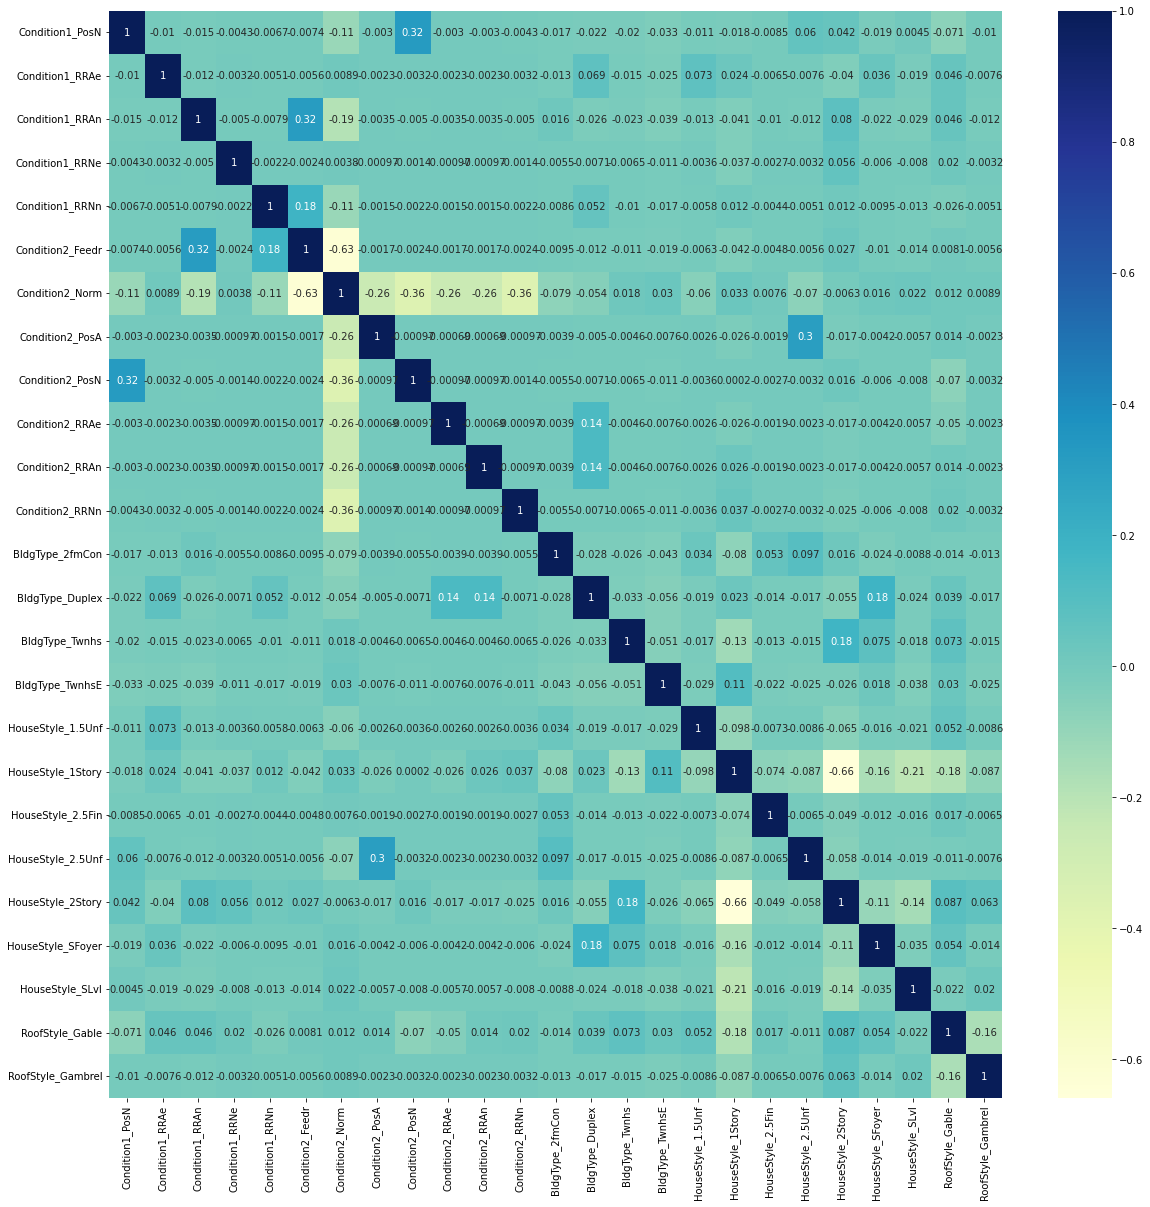

In [24]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_4].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 5 Corelation
Checking the Correlation and handle highly corelated variables

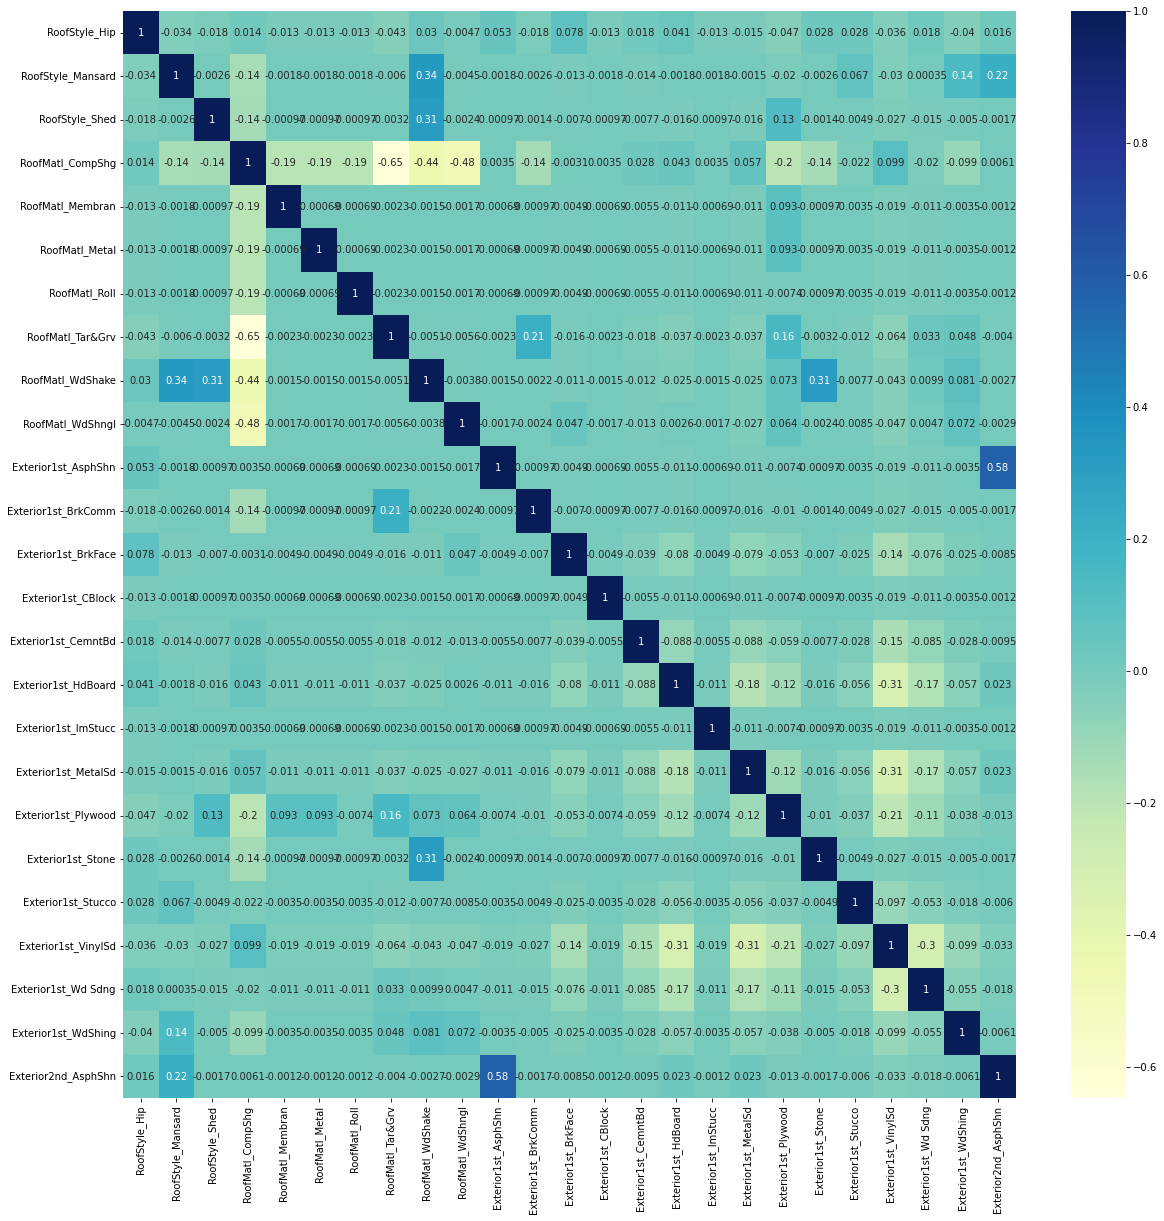

In [25]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_5].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 6 Corelation
Checking the Correlation and handle highly corelated variables

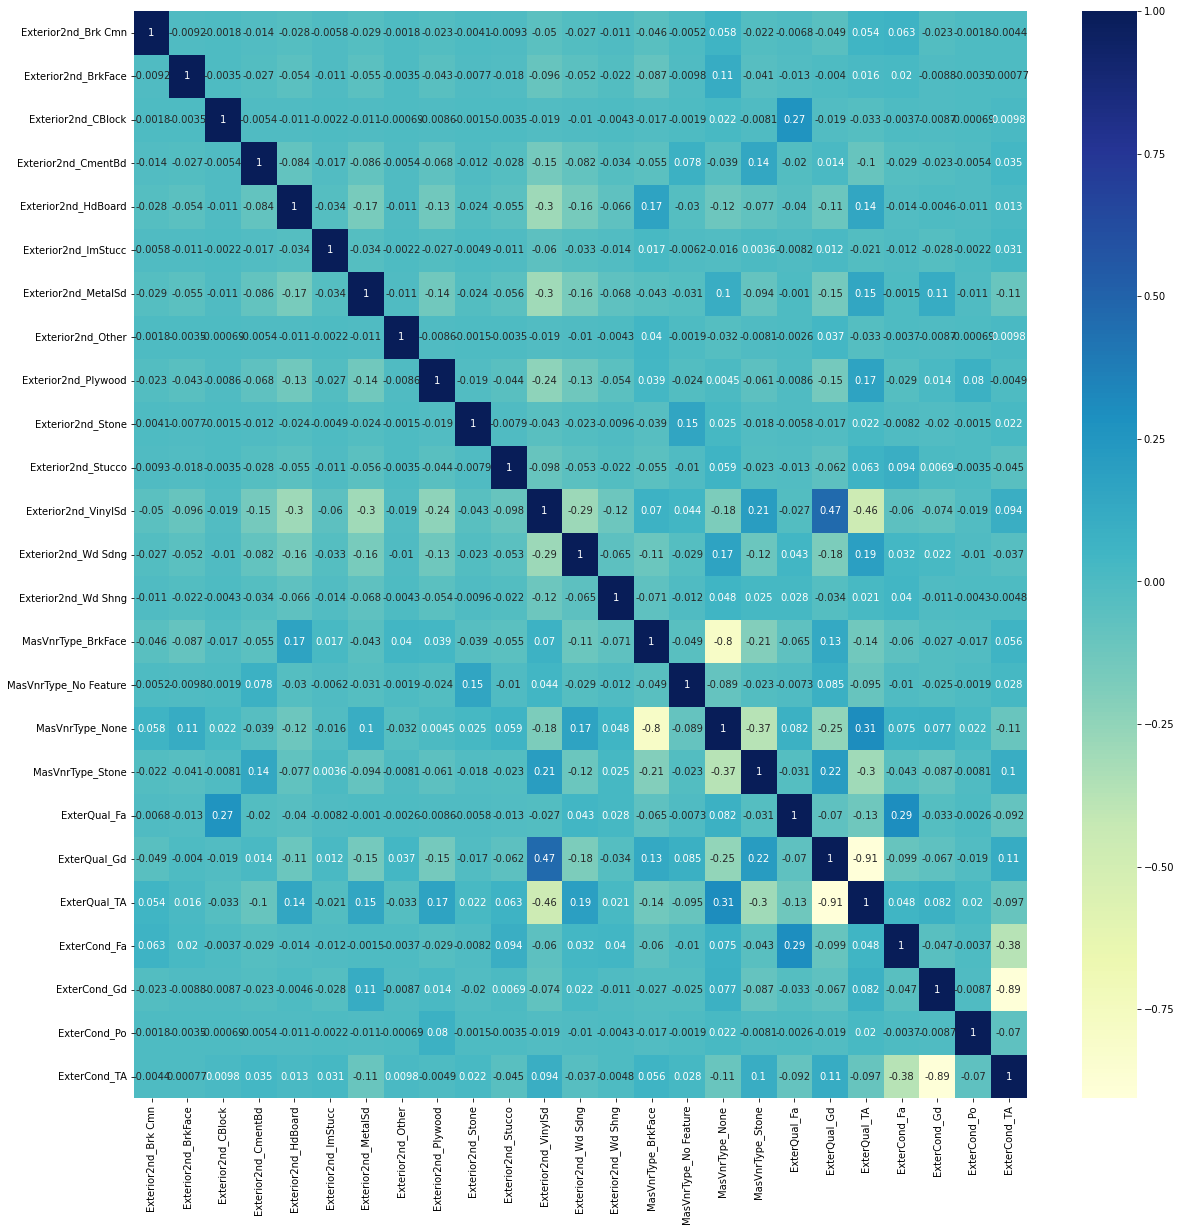

In [26]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_6].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 7 Corelation
Checking the Correlation and handle highly corelated variables

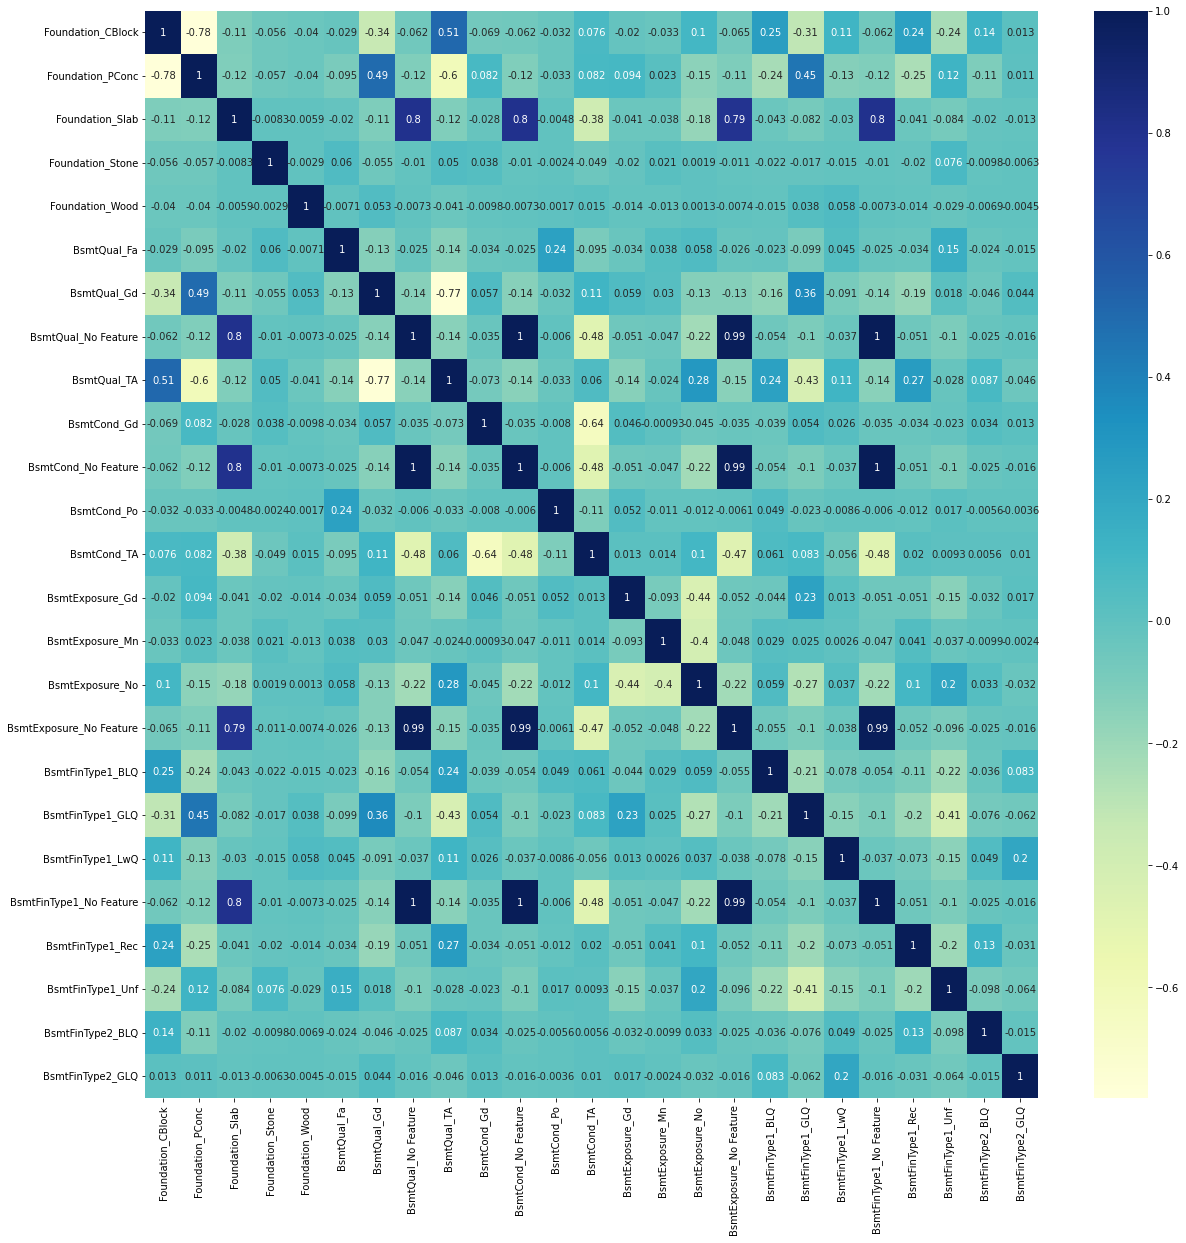

In [27]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_7].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 8 Corelation
Checking the Correlation and handle highly corelated variables

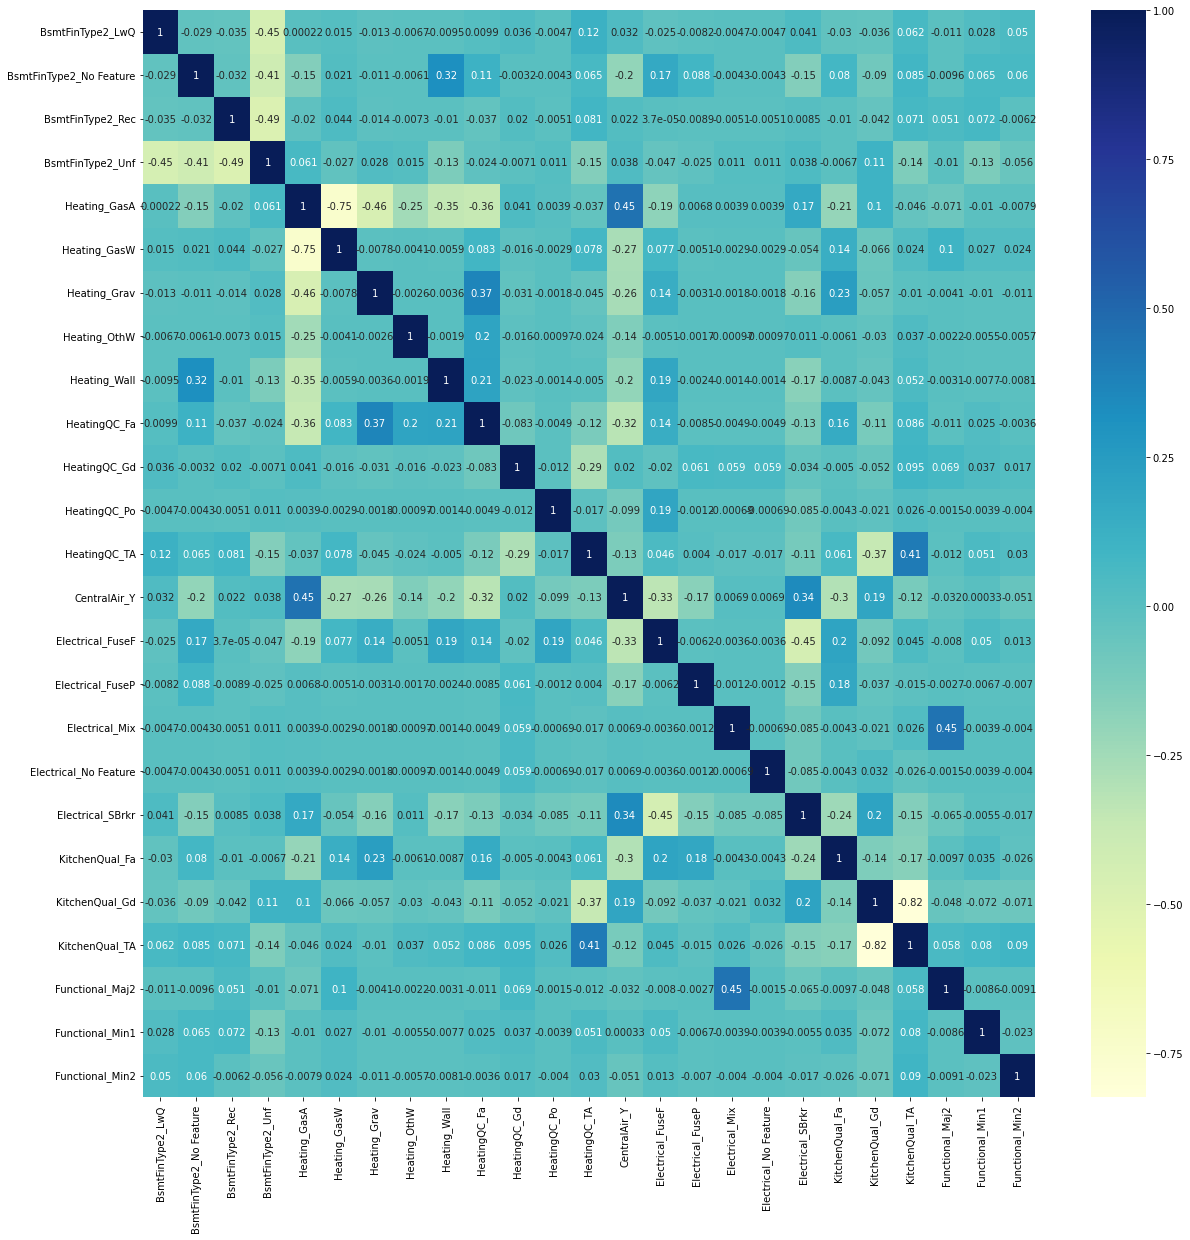

In [28]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_8].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 9 Corelation
Checking the Correlation and handle highly corelated variables

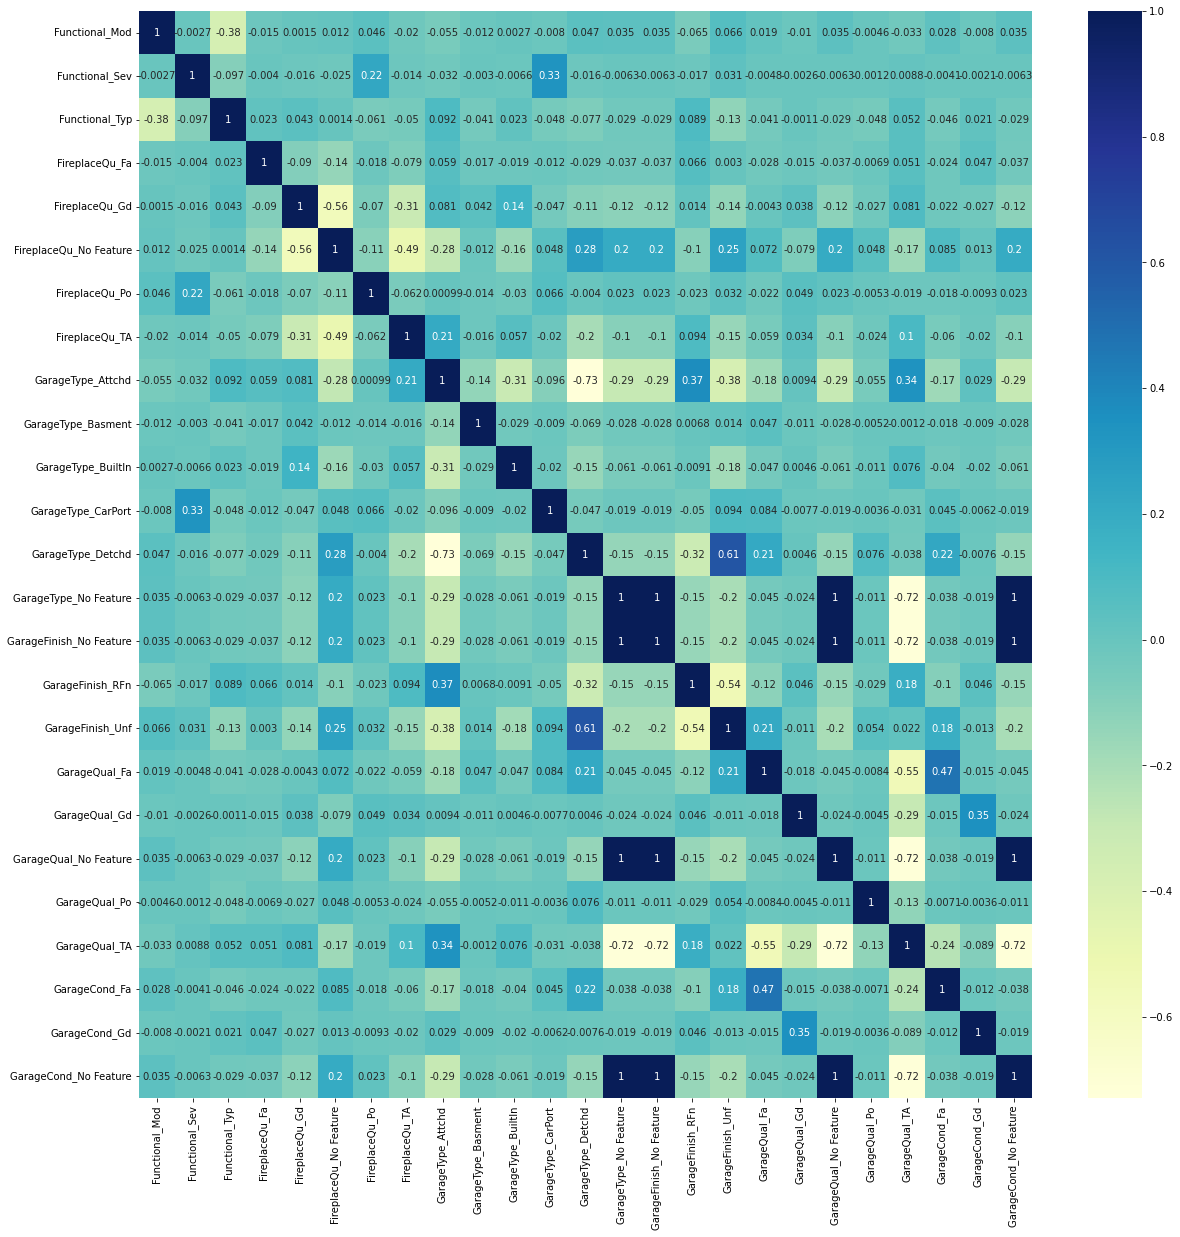

In [29]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_9].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Decision**
- **GarageCond_No_Feature has high rate of corelation with other variables**
- **GarageQual_No_Feature has high amount of co-relation with other variables** 


In [30]:
house_price_final.drop(columns=["GarageCond_No Feature","GarageQual_No Feature"],inplace=True)

#### Batch 10 Corelation
Checking the Correlation and handle highly corelated variables

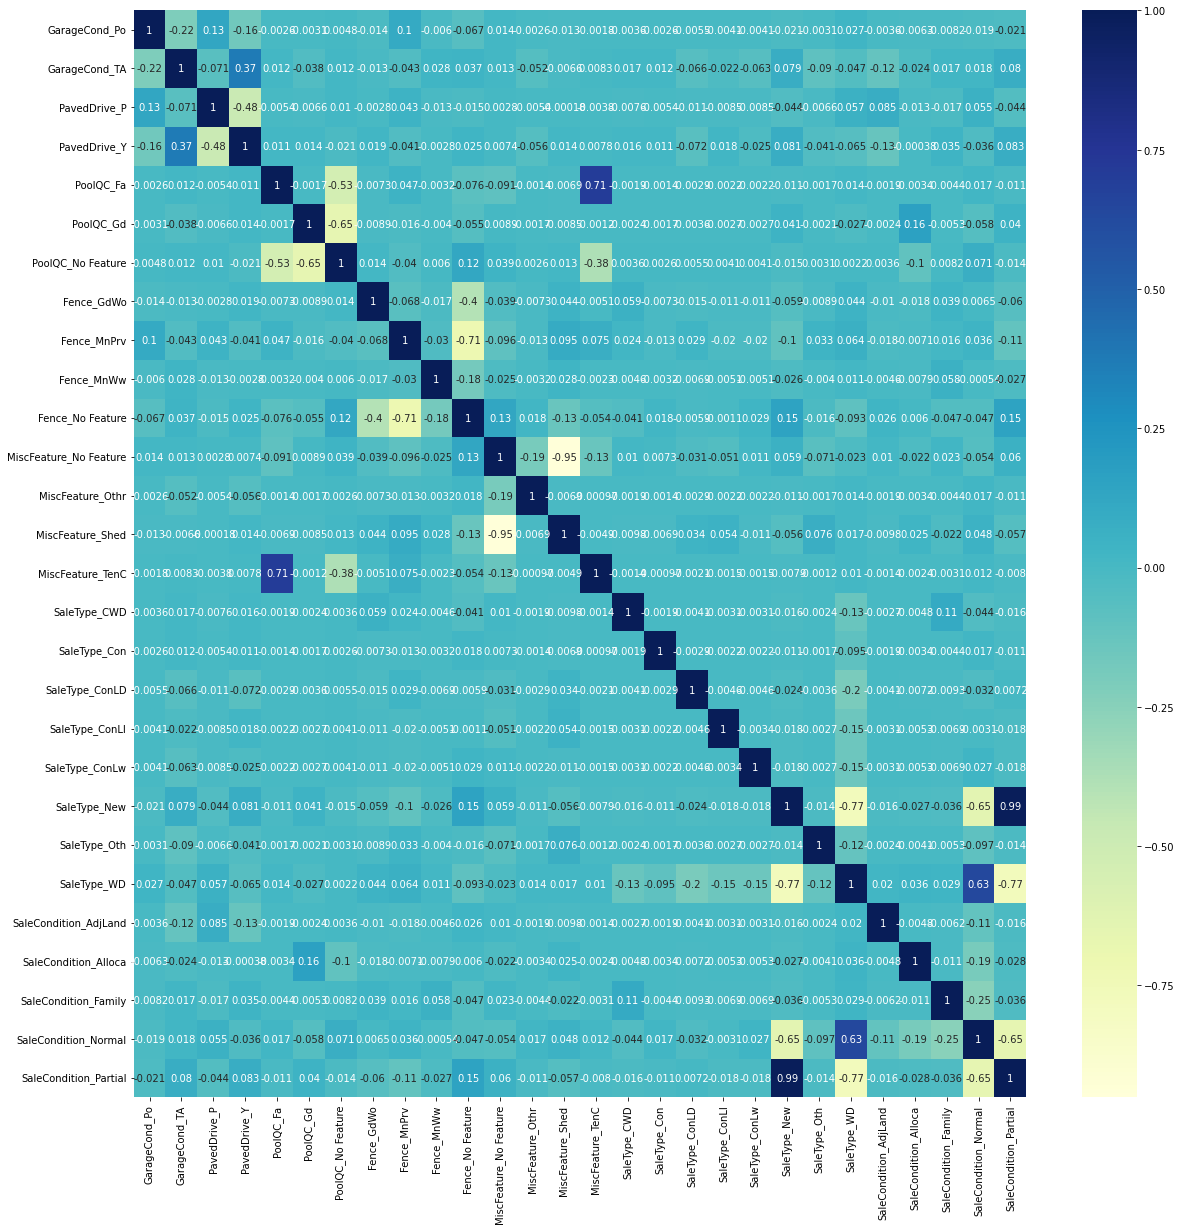

In [31]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_10].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Columns**
- **SaleType_New and SaleCondition_partial**

In [32]:
house_price_final.drop(columns=["SaleType_New"],inplace=True)

### Model Building

- Creating X and y variable to train our models

##### Initial Model Training
- Initially I'm going to create model without PCA
  - Simple Linear Regression
  - Test with Statsmodel
  - Fitting Ridge hyperparameter tuning
  - Fitting Lasso hyperparameter tuning
  - Elastic regression
  - Random Forest
  - Boosting

##### Model using PCA
- Initially I'm going to create model without PCA
  - Simple Linear Regression
  - Test with Statsmodel
  - Fitting Ridge hyperparameter tuning
  - Fitting Lasso hyperparameter tuning
  - Elastic regression
  - Random Forest
  - Boosting

  


#### Spliting Independent and dependent variables

**I have specific dataset for test, before tuning hyperparameter, I'm gonna fit my model in whole dataset, then test it with test data**

**While fitting Ridge and Lasso I'm gonna split for hyperparameter Tuning**

In [33]:
X=house_price_final.drop(columns="SalePrice")
y=house_price_final["SalePrice"]


In [34]:
# X and y are the features and labels, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Linear Regression



In [ ]:

#Creating Linear model object
linear_model = LinearRegression()

#Fitting Model
linear_model.fit(X_train,y_train)


LinearRegression()

In [ ]:


#Checking Intercept and Slopes of Line
#Slope
print(linear_model.coef_)

#Intercept
print(linear_model.intercept_)
#0.15401944764398745

[-1.44408189e-02 -1.21329637e-03  3.20438029e-02  5.53646072e-02
  4.12875190e-02  6.49430230e-02  2.43786681e-02  1.35619440e-04
  1.55176422e-02 -1.19761619e-02  5.54731703e-02  8.52350573e-02
  9.19451540e-02  1.15293290e-02  5.77124910e-03  1.12898247e-02
  1.03489655e-02  4.39612076e-03  1.01097624e-02  2.89816343e-02
  7.48760504e-03  6.90252461e-03 -1.35284185e-03 -3.46058254e-03
  3.51510037e-01  3.44712754e-01  3.13634631e-01  2.98538239e-01
 -3.15778074e-03 -1.90325012e-02  1.63191734e-02  2.41717759e-02
  3.27325806e-02  8.32076576e-03  3.08786366e-02 -1.40483957e-02
  1.86688878e-02 -1.54465316e-01  1.67260371e-02 -5.12925805e-02
 -1.60756176e-01 -1.13392886e-02 -4.75707691e-03  5.85627829e-02
 -1.28331500e-01 -1.22093085e-01 -2.86645418e-02 -2.11959787e-02
 -6.99169015e-02  6.40888859e-02 -1.12824667e-01 -6.43939017e-02
 -8.38785665e-02 -2.25727144e-01 -9.43328409e-02 -8.23976985e-02
  1.80432754e-02 -9.80513176e-02 -8.91892248e-04  7.96080217e-03
 -8.42423923e-02 -9.21550

In [ ]:
#Predict the target value
predicted_Value=linear_model.predict(X_train)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_train,"Predicted":predicted_Value})
Act_Pre_DataFrame

,Actual,Predicted
254,11.884489,11.860920
1066,12.089539,12.081778
638,11.350407,11.472990
799,12.072541,12.033759
380,11.751942,12.006785
...,...,...
1095,12.080691,12.061809
1130,11.813030,11.845418
1294,11.652687,11.655094
860,12.154516,12.056609


In [ ]:

r2=r2_score(y_train, predicted_Value)
r2

0.9461137597716046

In [ ]:
# Predict using Test Dataset
linear_model.predict(X_test)

array([ 1.19433743e+01,  1.27708076e+01,  1.15261772e+01,  1.20241367e+01,
        1.26393318e+01,  1.12988407e+01,  1.23868087e+01,  1.18951627e+01,
        1.12380133e+01,  1.18697753e+01,  1.19050703e+01,  1.16559327e+01,
        1.13117633e+01,  1.22580941e+01,  1.20669039e+01,  1.18048084e+01,
        1.21421481e+01,  1.17994540e+01,  1.16509295e+01,  1.22797801e+01,
        1.19434737e+01,  1.22255600e+01,  1.20409748e+01,  1.17596822e+01,
        1.21867725e+01,  1.19038341e+01,  1.21394202e+01,  1.16259659e+01,
        1.21044024e+01,  1.22117740e+01,  1.20950896e+01,  1.25227334e+01,
        1.22121350e+01,  1.16798437e+01,  1.24642922e+01,  1.19348882e+01,
        1.18454263e+01,  1.21956886e+01,  1.27286928e+01,  1.16827481e+01,
        1.17181750e+01,  1.23038686e+01,  1.16189000e+01,  1.27939936e+01,
        1.17619237e+01,  1.17643041e+01,  1.15570099e+01,  1.18260489e+01,
        1.30921707e+01,  1.18583621e+01,  1.17113986e+01,  1.22462102e+01,
        1.15719765e+01,  

In [ ]:

#Predict the target value
predicted_Value=linear_model.predict(X_test)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_test,"Predicted":predicted_Value})
Act_Pre_DataFrame

,Actual,Predicted
892,11.947949,11.943374
1105,12.691580,12.770808
413,11.652687,11.526177
522,11.976659,12.024137
1036,12.661914,12.639332
...,...,...
479,11.401670,11.898582
1361,12.468437,12.553358
802,12.149502,12.133232
651,11.589887,11.664709


In [ ]:
#Checking the metrics using Test data

r2=r2_score(y_test, predicted_Value)
r2

-2.0075752235544082e+21

**The Above linear model is Clearly overfit,because the number of feature is huge.However, if the model is too complex and has too many parameters relative to the size of the dataset, it may fit the noise in the data, rather than the underlying relationship between X and y.**

##### Simple linear regression using Statsmodel

In [ ]:
StatsModel_DataFrame=X_train.copy()
#Adding Constant to the equations
#By default the intercept didn't added to the model, so we need to add intercept by manual
StatsModel_DataFrame=sm.add_constant(StatsModel_DataFrame)
StatsModel_DataFrame

,const,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,1.0,-0.935412,0.388977,-0.347041,-0.798506,0.473704,-0.474928,-1.349731,-0.667124,1.112606,...,0,0,0,0,1,0,0,0,1,0
1066,1.0,0.131022,0.055022,-0.503675,-0.073043,1.511376,0.720752,0.442435,-0.667124,-1.015646,...,0,0,0,0,1,0,0,0,1,0
638,1.0,-0.668804,0.297898,-0.242154,-0.798506,1.511376,-2.035954,-1.688790,-0.667124,-1.015646,...,0,0,0,0,1,0,0,0,1,0
799,1.0,-0.135587,0.085381,-0.680897,-0.798506,1.511376,-1.139194,-1.688790,1.213227,0.297776,...,0,0,0,0,1,0,0,0,1,0
380,1.0,-0.135587,-0.218215,-1.292968,-0.798506,0.473704,-1.570968,-1.688790,-0.667124,-0.512437,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.0,-0.935412,0.631854,-0.091919,-0.073043,-0.563967,1.152525,1.023678,-0.667124,-0.960247,...,0,0,0,0,1,0,0,0,1,0
1130,1.0,-0.135587,0.237179,-0.512856,-1.523970,-2.120475,-1.438114,-1.688790,-0.667124,0.420116,...,0,0,0,0,1,0,0,0,1,0
1294,1.0,-0.935412,0.085381,-0.410473,-0.798506,1.511376,-0.541354,0.248687,-0.667124,-0.630160,...,0,0,0,0,1,0,0,0,1,0
860,1.0,-0.135587,-0.066417,-0.557927,0.652420,2.030211,-1.770248,0.636183,-0.667124,-1.015646,...,0,0,0,0,1,0,0,0,1,0


In [ ]:

#Running the linear model
linearModel=sm.OLS(y_train,StatsModel_DataFrame).fit()
#Checking for summary 
#With summary we can check the P-values
# Higher the P-value we have that much of evidence for Null hypothesis
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     68.62
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:40:29   Log-Likelihood:                 1147.6
No. Observations:                1168   AIC:                            -1817.
Df Residuals:                     929   BIC:                            -607.2
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.1423      0.358     28.349      0.000       9.440      10.844
MSSubClass                 -0.0144      0.020     -0.711      0.477      -0.054       0.025
LotFrontage                -0.0014      0.004     -0.349      0.727      -0.009       0.006
LotArea                     0.0322      0.006      5.401      0.000       0.021       0.044
OverallQual                 0.0556      0.007      7.688      0.000       0.041       0.070
OverallCond                 0.0416      0.005      8.783      0.000       0.032       0.051
YearBuilt                   0.0652      0.011      5.676      0.000       0.043       0.088
YearRemodAdd                0.0246      0.006      4.160      0.000       0.013       0.036
MasVnrArea                  0.0004      0.006      0.064      0.949      -0.012       0.013
BsmtFinSF1                  0.0143      0.015      0.950      0.342      -0.015       0.044
BsmtUnfSF                  -0.0133      0.015     -0.858      0.391      -0.044       0.017
TotalBsmtSF                 0.0571      0.016      3.460      0.001       0.025       0.089
1stFlrSF                    0.0848      0.011      8.025      0.000       0.064       0.105
2ndFlrSF                    0.0923      0.012      7.718      0.000       0.069       0.116
BsmtFullBath                0.0116      0.005      2.320      0.021       0.002       0.021
FullBath                    0.0058      0.006      0.933      0.351      -0.006       0.018
HalfBath                    0.0113      0.005      2.107      0.035       0.001       0.022
BedroomAbvGr                0.0104      0.006      1.840      0.066      -0.001       0.021
TotRmsAbvGrd                0.0045      0.008      0.596      0.551      -0.010       0.019
Fireplaces                  0.0115      0.009      1.336      0.182      -0.005       0.028
GarageArea                  0.0289      0.006      4.794      0.000       0.017       0.041
WoodDeckSF                  0.0076      0.004      2.069      0.039       0.000       0.015
OpenPorchSF                 0.0069      0.004      1.788      0.074      -0.001       0.014
MoSold                     -0.0014      0.003     -0.425      0.671      -0.008       0.005
YrSold                     -0.0036      0.004     -1.013      0.311      -0.010       0.003
MSZoning_FV                 0.3564      0.074      4.783      0.000       0.210       0.503
MSZoning_RH                 0.3514      0.074      4.781      0.000       0.207       0.496
MSZoning_RL                 0.3150      0.067      4.672      0.000       0.183       0.447
MSZoning_RM                 0.2979      0.065      4.599      0.000       0.171       0.425
Street_Pave                -0.0026      0.064     -0.040      0.968      -0.128       0.123
Alley_No Feature           -0.0190      0.021  

**Decision:**
- The Number of columns is numerous, this is a pet project dropping the columns in manuel is time waste 

**RFE is not working in Colab,so I'm gonna fit RFE latter,So currently I'm gonna fit Lasso and ridge regression right now**

#### Create Function for code reusablity

In [ ]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
        if model == 'ridge':
          estimator_model = Ridge()
        elif model=="Elastic":
          estimator_model = ElasticNet()
        else:
          estimator_model = Lasso()
        model_cv = GridSearchCV(estimator = estimator_model, 
                                param_grid = params, 
                                scoring= 'neg_mean_absolute_error', 
                                cv = 5, 
                                return_train_score=True,
                                verbose = 1)            
        model_cv.fit(X_train, y_train)
        alpha = model_cv.best_params_["alpha"]
        max_itr = model_cv.best_params_["max_iter"]
        print("Optimum alpha for %s is %f" %(model, alpha))
        final_model = model_cv.best_estimator_

        final_model.fit(X_train, y_train)
        y_train_pred = final_model.predict(X_train)
        y_test_pred = final_model.predict(X_test)
 
       # Model Evaluation
        print(model," Regression with ",alpha)
        print(model," Regression with ",max_itr)
        print("===================================")
        print('R2 score (train) : ',r2_score(y_train,y_train_pred))
        print('R2 score (test) : ',r2_score(y_test,y_test_pred))
        print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
        print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

        return final_model, y_test_pred
     

#### Ridge Regression

- Ridge regression consider as L2 regression, but it bring value closer towards zero, not zero so we unable to understand what are values important for particular target variables.

In [ ]:


#Ridge regression Model
parameters = {'alpha': (np.logspace(-8, 8, 100)),"max_iter":[10,20,30,50,100,200]}

ridge_final_model, y_test_predicted = build_model(X_train, y_train, X_test, parameters, model='ridge')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Optimum alpha for ridge is 11.233240
ridge  Regression with  11.233240329780312
ridge  Regression with  10
R2 score (train) :  0.9261447412605999
R2 score (test) :  0.9065246592460109
RMSE (train) :  0.10610758569239982
RMSE (test) :  0.1320748356331468


#### Lasso regression

In [ ]:
#Lasso Regression model
parameters = {'alpha': (np.logspace(-8, 8, 100)),"max_iter":[10,20,30,50,100,200]}

lasso_final_model, y_test_predicted = build_model(X_train, y_train, X_test, parameters, model='lasso')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Optimum alpha for lasso is 0.000486
lasso  Regression with  0.00048626015800653534
lasso  Regression with  50
R2 score (train) :  0.9236350539311107
R2 score (test) :  0.9024955866203488
RMSE (train) :  0.10789535435432397
RMSE (test) :  0.13489122145445134


In [ ]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.015422,-9.538835e-03
LotFrontage,-0.003365,-1.257616e-03
LotArea,0.030388,3.028403e-02
OverallQual,0.071000,7.687118e-02
OverallCond,0.044903,4.678385e-02
YearBuilt,0.045577,5.510322e-02
YearRemodAdd,0.025117,2.507742e-02
MasVnrArea,-0.001945,-0.000000e+00
BsmtFinSF1,0.004778,1.259504e-02
BsmtUnfSF,-0.021138,-1.391502e-02


#### Elastic Net

In [ ]:
#Elastic Net Regression model
parameters = {'alpha': (np.logspace(-8, 8, 100)),"max_iter":[10,20,30,50,100,200]}

lasso_final_model, y_test_predicted = build_model(X_train, y_train, X_test, parameters, model='elastic')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Optimum alpha for elastic is 0.000486
elastic  Regression with  0.00048626015800653534
elastic  Regression with  50
R2 score (train) :  0.9236350539311107
R2 score (test) :  0.9024955866203488
RMSE (train) :  0.10789535435432397
RMSE (test) :  0.13489122145445134


#### Random Forest

In [35]:
# Create a Random Forest classifier object
rfc = RandomForestRegressor()

#Fitting Model
rfc.fit(X_train,y_train)

#Predict the target value
predicted_Value=rfc.predict(X_train)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_train,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)

,Actual,Predicted
254,11.884489,11.872067
1066,12.089539,12.081465
638,11.350407,11.420259
799,12.072541,12.021977
380,11.751942,11.784630
303,11.917724,11.849393
86,12.066811,12.092277
1385,11.740061,11.678314
265,12.075394,12.073744
793,12.323856,12.356589


In [36]:
r2=r2_score(y_train, predicted_Value)
r2

0.9803309162957246

In [37]:
# Predict using Test Dataset
rfc.predict(X_test)

#Predict the target value
predicted_Value=rfc.predict(X_test)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_test,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)

,Actual,Predicted
892,11.947949,11.820876
1105,12.691580,12.662834
413,11.652687,11.712726
522,11.976659,11.849127
1036,12.661914,12.642257
614,11.231888,11.321779
218,12.649155,12.263225
1160,11.891362,11.907350
649,11.344507,11.351846
887,11.816727,11.716379


In [38]:

#Checking the metrics using Test data

r2=r2_score(y_test, predicted_Value)
r2

0.8749514596626153

- The difference between training and test model is nearly overfit, it shows our model gets overfit we need to handle this.

#### Random forest with basic hyperparameter

In [39]:

# Create a Random Forest regression object
rfr = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)

#Fitting Model
rfc.fit(X_train,y_train)

#Predict the target value
predicted_Value=rfc.predict(X_train)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_train,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)



,Actual,Predicted
254,11.884489,11.882150
1066,12.089539,12.078995
638,11.350407,11.416654
799,12.072541,12.019974
380,11.751942,11.759305
303,11.917724,11.859257
86,12.066811,12.092838
1385,11.740061,11.672055
265,12.075394,12.085133
793,12.323856,12.357434


In [40]:
r2_score(y_train,predicted_Value)

0.9787872148735719

In [41]:
# Predict using Test Dataset
rfc.predict(X_test)

#Predict the target value
predicted_Value=rfc.predict(X_test)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_test,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)

,Actual,Predicted
892,11.947949,11.844254
1105,12.691580,12.664821
413,11.652687,11.709826
522,11.976659,11.868959
1036,12.661914,12.706928
614,11.231888,11.359353
218,12.649155,12.253842
1160,11.891362,11.912101
649,11.344507,11.371574
887,11.816727,11.690794


In [42]:

#Checking the metrics using Test data

r2=r2_score(y_test, predicted_Value)
r2

0.8749634787077896

#### Minimum Hyperparameter

In [43]:
rfr = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100,150,175, 200],
    'max_depth': [3, 5,8,9, 10,12],
    'min_samples_split': [2,3,5,7,8,10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train,y_train )

# Print the best hyperparameters and score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.022998259283981134


In [44]:
rf_with_hyper=RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=2,n_estimators=200,random_state=42)

#Fitting Model
rf_with_hyper.fit(X_train,y_train)

#Predict the target value
predicted_Value=rf_with_hyper.predict(X_train)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_train,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)

,Actual,Predicted
254,11.884489,11.874864
1066,12.089539,12.069482
638,11.350407,11.428932
799,12.072541,12.020917
380,11.751942,11.778624
303,11.917724,11.853532
86,12.066811,12.102434
1385,11.740061,11.686689
265,12.075394,12.089002
793,12.323856,12.359163


In [45]:
r2_score(y_train,predicted_Value)

0.9699315493872358

In [46]:
# Predict using Test Dataset
rf_with_hyper.predict(X_test)

#Predict the target value
predicted_Value=rf_with_hyper.predict(X_test)

#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_test,"Predicted":predicted_Value})
Act_Pre_DataFrame.head(20)

,Actual,Predicted
892,11.947949,11.840756
1105,12.691580,12.665147
413,11.652687,11.706946
522,11.976659,11.847889
1036,12.661914,12.720193
614,11.231888,11.360442
218,12.649155,12.258932
1160,11.891362,11.903200
649,11.344507,11.348284
887,11.816727,11.719662


In [47]:
r2_score(y_test,predicted_Value)

0.877554609691979